In [15]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
nltk.download('punkt')
nltk.download('wordnet')

# Load dataset
file_path = 'reviews_dataset.csv'
data = pd.read_csv(file_path)

# Check dataset structure
print("Dataset Columns:", data.columns)

Dataset Columns: Index(['news', 'type'], dtype='object')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
if 'news' not in data.columns or 'type' not in data.columns:
    raise ValueError("The dataset must contain 'news' and 'type' columns.")

# Fill missing values
data['news'] = data['news'].fillna('')

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

data['tokens'] = data['news'].apply(tokenize_text)
data['news'][1]
# Display tokens after tokenization
print("Tokenized Data Sample:", data['tokens'].head())

Tokenized Data Sample: 0    [China, had, role, in, Yukos, split-up, China,...
1    [Oil, rebounds, from, weather, effect, Oil, pr...
2    [Indonesia, 'declines, debt, freeze, ', Indone...
3    [$, 1m, payoff, for, former, Shell, boss, Shel...
4    [US, bank, in, $, 515m, SEC, settlement, Five,...
Name: tokens, dtype: object


In [33]:
def lemmatize_words(tokens):
    # The lemmatizer should be applied to each word in the tokens list
    return [lemmatizer.lemmatize(word.lower()) for word in tokens]
    #return " ".join([lemmatizer.lemmatize(word) for word in tokens])

# Lemmatizing the tokenized words in the 'review' column
# Ensure the 'tokens' column exists before applying lemmatization
data['lemmatized_review'] = data['tokens'].apply(lemmatize_words)
data['lemmatized_review'][1]

['oil',
 'rebound',
 'from',
 'weather',
 'effect',
 'oil',
 'price',
 'recovered',
 'in',
 'asian',
 'trade',
 'on',
 'tuesday',
 ',',
 'after',
 'falling',
 'in',
 'new',
 'york',
 'on',
 'milder',
 'winter',
 'weather',
 'across',
 'the',
 'u',
 '.',
 'with',
 'winter',
 'temperature',
 'staying',
 'relatively',
 'high',
 'in',
 'the',
 'northern',
 'u',
 ',',
 'a',
 'barrel',
 'of',
 'light',
 'crude',
 'ended',
 'monday',
 'down',
 '$',
 '1.33',
 'to',
 '$',
 '42.12',
 '.',
 'however',
 'crude',
 'price',
 'have',
 'rebounded',
 'in',
 'asia',
 ',',
 'rising',
 'to',
 '$',
 '42.30',
 'a',
 'barrel',
 'for',
 'february',
 'delivery',
 '.',
 'in',
 'london',
 ',',
 'trading',
 'of',
 'brent',
 'crude',
 'wa',
 'suspended',
 'for',
 'a',
 'public',
 'holiday',
 ',',
 'but',
 'the',
 'price',
 'fell',
 'to',
 '$',
 '39.20',
 'in',
 'the',
 'far',
 'east',
 '.',
 'with',
 'milder',
 'temperature',
 'expected',
 'to',
 'continue',
 'in',
 'the',
 'northern',
 'part',
 'of',
 'the',
 'u'

In [19]:
### Vectorize Using Bigram and Trigram Techniques

vectorizer = CountVectorizer(ngram_range=(2, 3))
X = vectorizer.fit_transform(data['processed_text'])
y = data['type']

# Display vectorized feature size
print("Vectorized Feature Size:", X.shape)

Vectorized Feature Size: (2225, 922588)


In [20]:
### Apply Random Forest Algorithm with 150 Trees

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Display training completion
print("Random Forest Model Trained with 150 Trees")

# Predictions
y_pred = rf_model.predict(X_test)

Random Forest Model Trained with 150 Trees


Model Accuracy: 0.87

Classification Report:
                precision    recall  f1-score     support
business        0.788321  0.939130  0.857143  115.000000
entertainment   0.928571  0.722222  0.812500   72.000000
politics        0.970149  0.855263  0.909091   76.000000
sport           0.821138  0.990196  0.897778  102.000000
tech            0.967742  0.750000  0.845070   80.000000
accuracy        0.867416  0.867416  0.867416    0.867416
macro avg       0.895184  0.851362  0.864316  445.000000
weighted avg    0.881845  0.867416  0.865936  445.000000


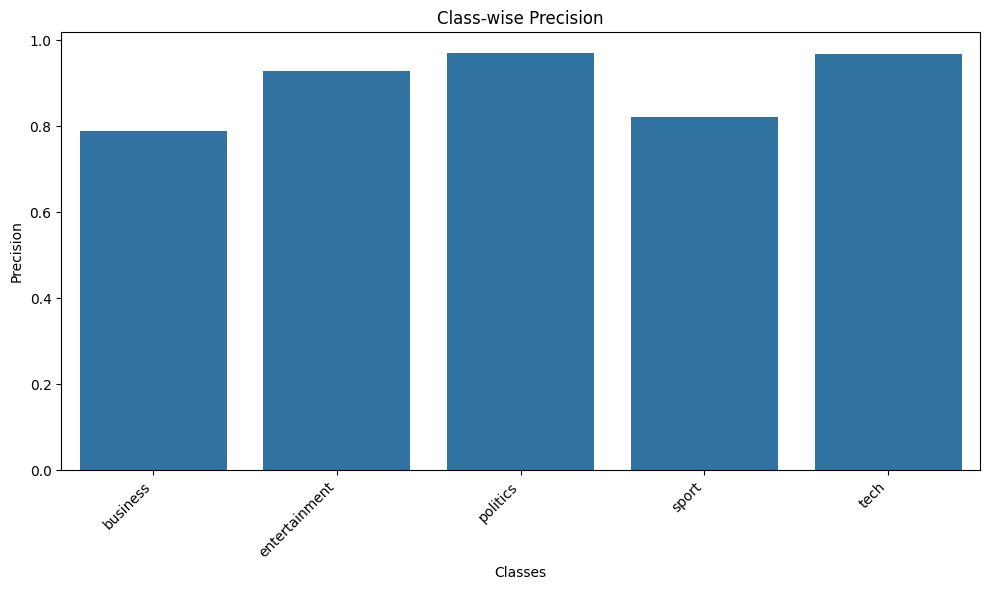

In [21]:
### Evaluate Overall Accuracy of the Model and Class-wise Precision

# Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Precision for each class
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display Classification Report
print("\nClassification Report:\n", report_df)

# Visualization of Class-wise Precision
plt.figure(figsize=(10, 6))
sns.barplot(x=report_df.index[:-3], y=report_df['precision'][:-3])
plt.xticks(rotation=45, ha='right')
plt.title('Class-wise Precision')
plt.ylabel('Precision')
plt.xlabel('Classes')
plt.tight_layout()
plt.show()

In [22]:
def summarize_results():
    print("Random Forest Model Performance")
    print("Accuracy:", accuracy)
    print(report_df)

summarize_results()

Random Forest Model Performance
Accuracy: 0.8674157303370786
               precision    recall  f1-score     support
business        0.788321  0.939130  0.857143  115.000000
entertainment   0.928571  0.722222  0.812500   72.000000
politics        0.970149  0.855263  0.909091   76.000000
sport           0.821138  0.990196  0.897778  102.000000
tech            0.967742  0.750000  0.845070   80.000000
accuracy        0.867416  0.867416  0.867416    0.867416
macro avg       0.895184  0.851362  0.864316  445.000000
weighted avg    0.881845  0.867416  0.865936  445.000000


In [23]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
# nltk.download('omw-1.4')

data = pd.read_csv('reviews_dataset.csv')

print(data.shape)
print(data.head)
news = data['news']
type = data['type']

def preprocess_text(text):

    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]

    lemmatizer = WordNetLemmatizer()

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

news = news.apply(preprocess_text)
print(news)

vectorizer = CountVectorizer(ngram_range=(2, 3))
X = vectorizer.fit_transform(news)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, type, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Overall Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(2225, 2)
<bound method NDFrame.head of                                                    news      type
0     China had role in Yukos split-up\n \n China le...  business
1     Oil rebounds from weather effect\n \n Oil pric...  business
2     Indonesia 'declines debt freeze'\n \n Indonesi...  business
3     $1m payoff for former Shell boss\n \n Shell is...  business
4     US bank in $515m SEC settlement\n \n Five Bank...  business
...                                                 ...       ...
2220  Microsoft launches its own search\n \n Microso...      tech
2221  Warnings about junk mail deluge\n \n The amoun...      tech
2222  Microsoft gets the blogging bug\n \n Software ...      tech
2223  Gamers snap up new Sony PSP\n \n Gamers have b...      tech
2224  Apple laptop is 'greatest gadget'\n \n The App...      tech

[2225 rows x 2 columns]>
0       china had role in yukos china lent russia to h...
1       oil rebound from weather effect oil price reco...
2       indonesia debt fre